# Linear Regression
diabetes dataset description:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html    
https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset  
linear regression model:  
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
# import 套件和載入資料
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized # 這份資料已經標準化所以可以跳過標準化流程 大部分要自己做
diabetes = datasets.load_diabetes()
print(diabetes)
# use all of features 
print(type(diabetes))
diabetes_X = diabetes.data
diabetes_y = diabetes.target


print("diabetes_X shape: {}".format(diabetes_X.shape))
print("diabetes_y shape: {}".format(diabetes_y.shape))

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [11]:
#Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
train_test_split(diabetes_X, diabetes_y, test_size=0.1, random_state=1)

# 通常在這裡要做train訓練資料 normalization 但這個資料原始有做標準化 所以跳過

#Build Linear regression model
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train) # 建模一定只能放入train data

# 這裡通常要做test測試資料的normalization

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_)) # parameters 01,02,03,....010
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))                         

Coefficients: [ -26.2759041  -231.92697391  566.49859849  303.08631061 -709.86807128
  428.67719627   82.12319677  165.60628133  729.33691844   42.58281733]

Mean squared error: 3319.6925871395583
R2 score: 0.31749491764735915


In [12]:
!pip install matplotlib

In [31]:
%matplotlib inline 
# %matplotlib inline这一句是IPython的魔法函数
# 可以在IPython编译器里直接使用，作用是内嵌画图，省略掉plt.show()这一步，直接显示图像
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized
diabetes = datasets.load_diabetes()

# Use attribute 3 as the data (total 10 vector) 
# diabetes_X2 = diabetes.data
# diabetes_X1 = diabetes.data[:,3] # [: , none]是為了要讓shape型狀完整(442,) ->(442,1)
diabetes_X = diabetes.data[:,None,3] # correct 用所有資料的第三個特徵作為data
# print(diabetes_X2.shape)
# print(diabetes_X1.shape)
print(diabetes_X.shape)
diabetes_y = diabetes.target

(442, 1)


In [32]:
#Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
train_test_split(diabetes_X, diabetes_y, test_size=0.1, random_state=1)

#Build Linear regression model
model = linear_model.LinearRegression()

# skip train data normalized
# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# skip test data normalized
# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))
     

Coefficients: [717.54004052]

Mean squared error: 3852.2115862986325
R2 score: 0.20801281536373262


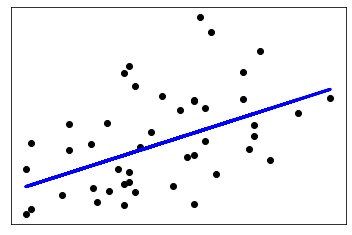

In [38]:
%matplotlib inline 
# 可以在IPython编译器里直接使用，作用是内嵌画图，省略掉plt.show()这一步，直接显示图像
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black') # black points
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3) # blue line

plt.xticks(())
plt.yticks(())
plt.show()

# Polynomial Regression
linear regression model:  
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [42]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

print('X is \n{}'.format(X))
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 # x0,x1 degree=3 - > x0^3 ,x0^2, x1, x0x1^2 , x1^3, x0^2, x0x1 , x1^2, x0 , x1, 1 

# degreeint or tuple (min_degree, max_degree), default=2
poly = PolynomialFeatures(2) 

# X_poly = poly.fit_transform(X) # mean fit + transform
poly.fit(X)
X_poly = poly.transform(X)

print('X_poly is \n{}'.format(X_poly))

X is 
[[0 1]
 [2 3]
 [4 5]]
X_poly is 
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x) # sin(x) 曲線圖過於曲折模型結果通常不會太好


# create 100 data points that is uniformly in the range [0, 10] 
X = np.linspace(0, 10, 100)
np.random.shuffle(X) # shuffle()洗牌
X = X.reshape(-1,1)  # -1 表示請numpy自己算數字多少才合理
y = f(X)
print('after reshaping, shape of X is {}'.format(X.shape))

after reshaping, shape of X is (100, 1)


In [53]:
# show origin X data (only the first 5 data points)
print('origin X is {}:'.format(X[:5]))
print('origin Y is {}:'.format(y[:5]))

poly = PolynomialFeatures(degree=2) # degree =2
X_poly = poly.fit_transform(X)

# show poly transform X data (only the first 5 data points)
print('after ploy transform X is {}:'.format(X_poly[:5]))

# split data (70,30)
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1)
# random_state 種子值
# normalized train data
scaler = preprocessing.StandardScaler().fit(X_train) # 計算統計變量
X_train = scaler.transform(X_train) # 標準化

#build linear model and get prdiction
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score r2 : {}'.format(r2_score(y_test, y_pred)))

origin X is [[1.61616162]
 [1.71717172]
 [8.38383838]
 [4.94949495]
 [0.90909091]]:
origin Y is [[ 1.61449886]
 [ 1.69880869]
 [ 7.2342421 ]
 [-4.81101711]
 [ 0.71722315]]:
after ploy transform X is [[ 1.          1.61616162  2.61197837]
 [ 1.          1.71717172  2.94867871]
 [ 1.          8.38383838 70.28874605]
 [ 1.          4.94949495 24.49750026]
 [ 1.          0.90909091  0.82644628]]:
Coefficients: [[ 0.         -3.30985824  4.88917521]]

Mean squared error: 18.355781828271635
Variance score r2 : -0.4713400018922298


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * x - 3 *x  + 1


# create 100 data points that is uniformly in the range [0, 10] 
X = np.linspace(0, 10, 100)
np.random.shuffle(X)
X = X.reshape(-1,1)
y = f(X)
print('after reshaping, shape of X is {}'.format(X.shape))

# show origin X data (only the first 5 data points)
print('origin X is {}:'.format(X[:5]))

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X_poly = poly.transform(X)

# show poly transform X data (only the first 5 data points)
print('after ploy transform X is {}:'.format(X_poly[:5]))


X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: {}'.format(r2_score(y_test, y_pred)))

after reshaping, shape of X is (100, 1)
origin X is [[7.67676768]
 [4.74747475]
 [1.01010101]
 [1.91919192]
 [7.07070707]]:
after ploy transform X is [[ 1.          7.67676768 58.93276196]
 [ 1.          4.74747475 22.53851648]
 [ 1.          1.01010101  1.02030405]
 [ 1.          1.91919192  3.68329762]
 [ 1.          7.07070707 49.99489848]]:
Coefficients: [[ 0.         -8.33910634 29.47652561]]

Mean squared error: 1.4949407192003936e-28
Variance score R2: 1.0


rmse is 11.901779012038903
R2 is 0.9830071790386679


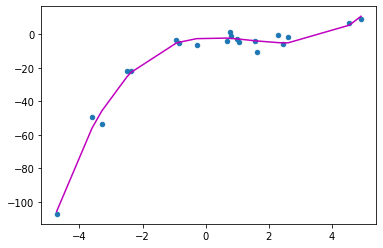

In [89]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, None]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3) # 調整degree會影響mse R2結果
x_poly = polynomial_features.fit_transform(x)
# fit_transform(X[, y]) : Fit to data, then transform it.

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = mean_squared_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('rmse is {}'.format(rmse))
print('R2 is {}'.format(r2))

plt.scatter(x, y, s=20) # x_test, y_test (label)
# X_poly = poly.transform(X)
# transform(X) Transform data to polynomial features.
# sort the values of x before line plot:
# sort_axis = operator.itemgetter(0) # 取得維度資料回傳的是函式不是值
sorted_zip = sorted(zip(x,y_poly_pred)) #以key=sort_axis排序
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='m')
plt.show()


# Lasso, Ridge, Elastic Net  
lasso model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html   
ridge model: https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.Ridge.html  
elastic net: https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.ElasticNet.html

In [9]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized
diabetes = datasets.load_diabetes()

# use all of features 
diabetes_X = diabetes.data
diabetes_y = diabetes.target

print("diabetes_X shape: {}".format(diabetes_X.shape))
print("diabetes_y shape: {}".format(diabetes_y.shape))


#Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
train_test_split(diabetes_X, diabetes_y, test_size=0.1, random_state=1)

#Normalized train data
scaler = preprocessing.StandardScaler().fit(diabetes_X_train) # 計算統計變量
diabetes_X_train = scaler.transform(diabetes_X_train) # 標準化

#Build model
# model = linear_model.Lasso(alpha=0.95) #alpha 調整可以抽特徵
model = linear_model.Ridge(alpha=1.5)
#model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

#Normalized test data
diabetes_X_test= scaler.transform(diabetes_X_test)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))

diabetes_X shape: (442, 10)
diabetes_y shape: (442,)
Coefficients: [ -1.19865095 -10.93690979  27.47873406  14.35535031 -24.14784384
  12.62069     -0.37303422   6.72893501  31.52950905   2.13422237]

Mean squared error: 3330.422109158785
R2 score: 0.315289004564411
number of model coef: 10


In [8]:
mask = (model.coef_ != 0) # 留下重要的因子
print(model.coef_)
print(mask)
print('before feature extraction, diabete_X shape: {}'.format(diabetes_X.shape))
diabetes_X = diabetes_X[:, mask]
print('after feature extraction, diabete_X shape: {}'.format(diabetes_X.shape))

[ -1.21246213 -10.96527092  27.47013486  14.37558379 -26.70108995
  14.6086674    0.744508     7.02206265  32.54565129   2.10517432]
[ True  True  True  True  True  True  True  True  True  True]
before feature extraction, diabete_X shape: (442, 10)
after feature extraction, diabete_X shape: (442, 10)


In [ ]:
import numpy as np
my_numpy = np.array([1,2,3,4,5])
bool_index = my_numpy > 3
print(bool_index)
print(my_numpy[bool_index])